In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Подключение к google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/bank_reviews_nlp/banki_ru_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513560 entries, 0 to 513559
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   url                      513560 non-null  object
 1   date_review              513560 non-null  object
 2   time_review              513560 non-null  object
 3   user_name                513560 non-null  object
 4   user_city                513560 non-null  object
 5   review_title             513560 non-null  object
 6   review_text              513560 non-null  object
 7   review_status            513560 non-null  object
 8   rating                   513560 non-null  object
 9   clear_conditions_rating  513560 non-null  int64 
 10  polite_staff_rating      513560 non-null  int64 
 11  support_rating           513560 non-null  int64 
 12  app_site_rating          513560 non-null  int64 
 13  bank_name                513560 non-null  object
 14  is_bank_ans         

In [4]:
df = df[['review_text', 'bank_name', 'date_review', 'date_bank_ans', 'review_status', 'rating']]
df.head()

,review_text,bank_name,date_review,date_bank_ans,review_status,rating
0,воспользовался услугой перевод баланса на част...,Тинькофф Банк,01.01.2024,2024-01-02,Отзыв проверен,Оценка\n3
1,"Здравствуйте, хотел бы поделится своим опытом ...",Альфа-Банк,01.01.2024,2024-01-12,Отзыв проверен,Оценка\n5
2,Пользуюсь картой Халва уже четыре года.Доволен...,Совкомбанк,01.01.2024,2024-01-05,Отзыв проверен,Оценка\n4
3,Нужно было оплатить обязательные налоги за 202...,Тинькофф Банк,01.01.2024,2024-01-16,Отзыв проверен,Оценка\n5
4,"Карта полностью понравилось ,дали платежные ст...",Альфа-Банк,01.01.2024,2024-01-13,Отзыв проверен,Оценка\n5


Предобработаем текст обращения: оставим слова длиной 3 символа и выше, приведем все буквы к строчному виду и заменим часть символов

In [5]:
df['review_text_processed'] = df['review_text'].apply(lambda x: x.lower())
df['review_text_processed'] = df['review_text_processed'].apply(lambda x: x.replace('\r', ' ').replace('\n', ' '))
df['review_text_processed'] = df['review_text_processed'].apply(lambda x: ' '.join([x for x in x.split() if len(x) >= 3]))

df.head()

,review_text,bank_name,date_review,date_bank_ans,review_status,rating,review_text_processed
0,воспользовался услугой перевод баланса на част...,Тинькофф Банк,01.01.2024,2024-01-02,Отзыв проверен,Оценка\n3,воспользовался услугой перевод баланса часть с...
1,"Здравствуйте, хотел бы поделится своим опытом ...",Альфа-Банк,01.01.2024,2024-01-12,Отзыв проверен,Оценка\n5,"здравствуйте, хотел поделится своим опытом бан..."
2,Пользуюсь картой Халва уже четыре года.Доволен...,Совкомбанк,01.01.2024,2024-01-05,Отзыв проверен,Оценка\n4,пользуюсь картой халва уже четыре года.доволен...
3,Нужно было оплатить обязательные налоги за 202...,Тинькофф Банк,01.01.2024,2024-01-16,Отзыв проверен,Оценка\n5,нужно было оплатить обязательные налоги 2023 г...
4,"Карта полностью понравилось ,дали платежные ст...",Альфа-Банк,01.01.2024,2024-01-13,Отзыв проверен,Оценка\n5,"карта полностью понравилось ,дали платежные ст..."


Посчитаем длину текста обращений и посмотрим на статистику по нему

In [6]:
df['review_text_length'] = df['review_text_processed'].apply(lambda x: len(x.split()))
df['review_text_length'].describe().round(2)

count    513560.00
mean         98.80
std          70.94
min           0.00
25%          44.00
50%          86.00
75%         123.00
max        4507.00
Name: review_text_length, dtype: float64

In [7]:
# для Газпромбанка

df[df.bank_name == 'Газпромбанк']['review_text_length'].describe().round(2)

count    9389.00
mean      120.53
std        83.27
min         2.00
25%        62.00
50%        99.00
75%       151.00
max       564.00
Name: review_text_length, dtype: float64

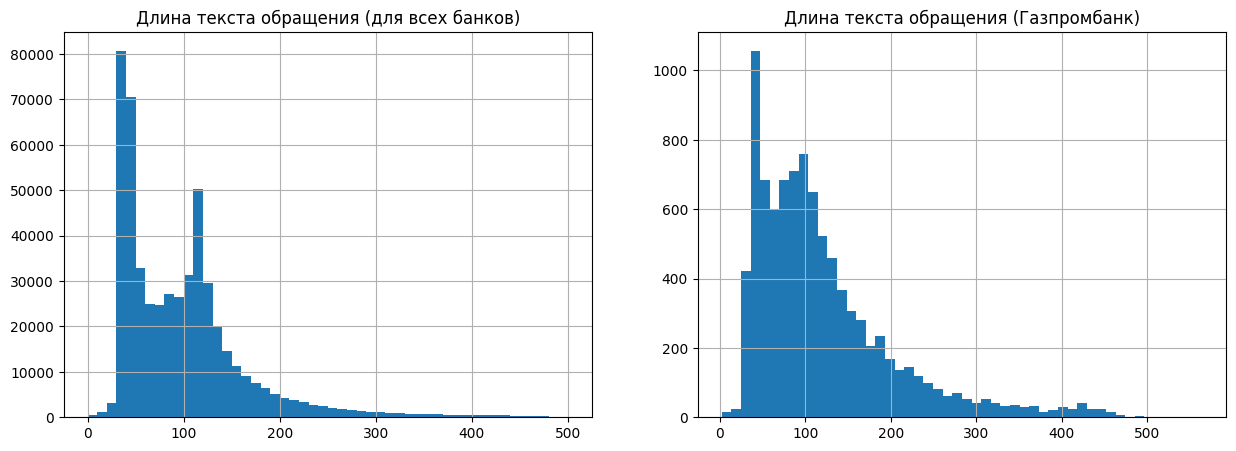

In [8]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Длина текста обращения (для всех банков)")
df[df['review_text_length'] <= 500]['review_text_length'].hist(bins=50)

plt.subplot(1, 2, 2)
plt.title("Длина текста обращения (Газпромбанк)")
df[df.bank_name == 'Газпромбанк']['review_text_length'].hist(bins=50);

Посмотрим, как быстро банки отвечают на обращения пользователей

In [9]:
# Оставим только те, где есть ответы банка (~99.4 %)
df = df[df['date_bank_ans'] != 'unk']

df['date_review'] = pd.to_datetime(df['date_review'], format='%d.%m.%Y')
df['date_bank_ans'] = pd.to_datetime(df['date_bank_ans'])

df['answer_length'] = (df['date_bank_ans'] - df['date_review']).dt.days

In [10]:
df['answer_length'].describe().round(2)

count    510637.00
mean          9.75
std          16.60
min           0.00
25%           1.00
50%           4.00
75%          10.00
max         373.00
Name: answer_length, dtype: float64

In [11]:
df[df['bank_name'] == 'Газпромбанк']['answer_length'].describe().round(2)

count    9388.00
mean        0.52
std         2.49
min         0.00
25%         0.00
50%         0.00
75%         1.00
max       142.00
Name: answer_length, dtype: float64

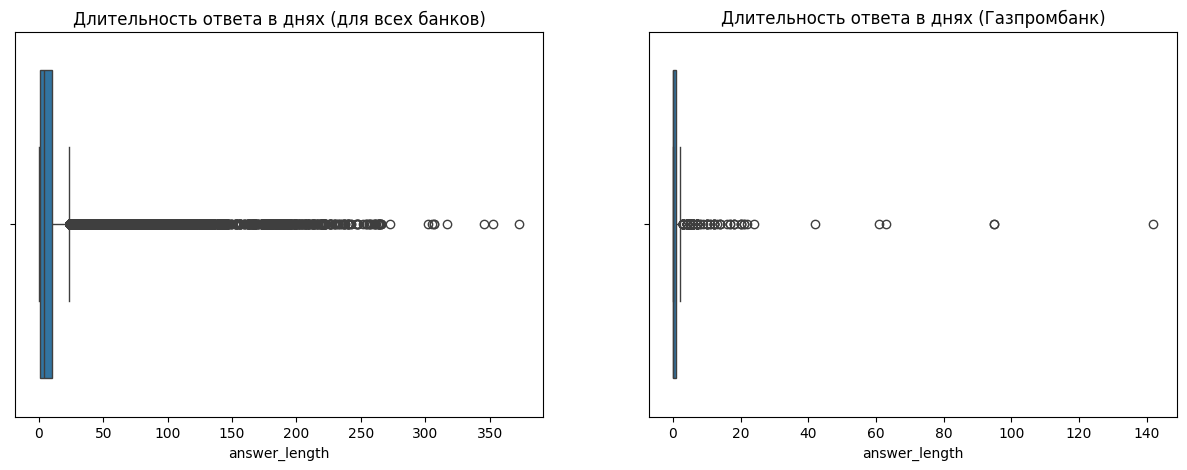

In [12]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Длительность ответа в днях (для всех банков)")
sns.boxplot(x=df['answer_length'])

plt.subplot(1, 2, 2)
plt.title("Длительность ответа в днях (Газпромбанк)")
sns.boxplot(x=df[df['bank_name'] == 'Газпромбанк']['answer_length']);

Изучим, как распределен оценки

In [13]:
# Оствим только те отзывы, где есть оценка, то есть отзыв проверен и учитывается в рейтинге

df = df[(df['review_status'] != 'unk') & (df['review_status'] != 'Отзыв проверяется')]
df['rating'] = df['rating'].apply(lambda x: x[-1])
df['rating'] = df['rating'].astype('int')

df['rating'].describe().round(2)

count    481298.00
mean          4.40
std           1.36
min           1.00
25%           5.00
50%           5.00
75%           5.00
max           5.00
Name: rating, dtype: float64

In [14]:
df[df['bank_name'] == 'Газпромбанк']['rating'].describe().round(2)

count    8695.00
mean        2.60
std         1.85
min         1.00
25%         1.00
50%         1.00
75%         5.00
max         5.00
Name: rating, dtype: float64

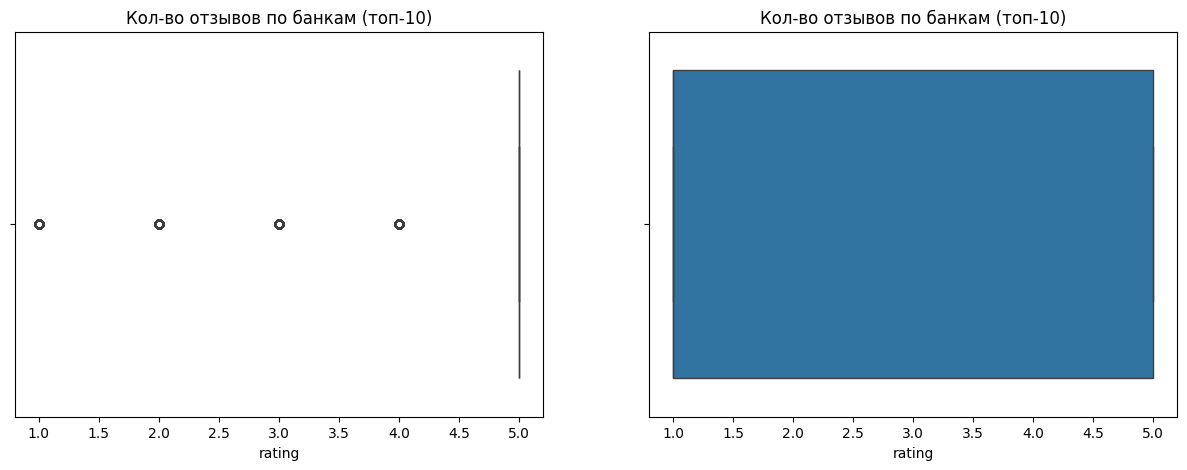

In [15]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Кол-во отзывов по банкам (топ-10)")
sns.boxplot(x=df['rating'])

plt.subplot(1, 2, 2)
plt.title("Кол-во отзывов по банкам (топ-10)")
sns.boxplot(x=df[df.bank_name == 'Газпромбанк']['rating']);

Посмотрим корреляцию между временем ответа банка и рейтингом и проверим гипотезу: зависит ли длительность подготовки ответа от оценки (в том смысле, что для хороших оценок охотнее готовят ответ)

In [16]:
df['rating'].corr(df['answer_length'])

0.09516831212506824

Видим очень незначительную положительную корреляцию. То есть получаем, что есть очень небольшая прямая зависимость - с увеличением оценки, чуть увеличивается время ожидания ответа банка.

Это логично - скорее всего банк будет довольно быстро реагировать и отвечать на отзывы с плохой оценкой и медленнее на отзывы с хорошей.